#**Market Analysis using ML**

### **Porters weight determination using PCA**

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'Rivalry': [4, 3, 5, 3],
    'Substitution': [3, 4, 2, 4],
    'Entrants': [3.5, 2, 4.5, 2],
    'Customers': [3, 4, 3, 4],
    'Suppliers': [2, 2, 2.5, 3.5],
    'Distributor': [5, 5, 5, 4],
    'Complement': [5, 5, 5, 4],
    'Quality': [5, 5, 5, 4]
}, index=['Green H2', 'Other H2', 'Other Renewable', 'Other Non-Renewable'])

pca = PCA()
pca.fit(data)

explained_variance = pca.explained_variance_ratio_
loadings = pca.components_
explained_variance = explained_variance.reshape(-1, 1)

weights = np.sum(np.abs(loadings) * explained_variance, axis=0)
normalized_weights = weights / np.sum(weights)

weights_df = pd.DataFrame({
    'Factor': data.columns,
    'Weight': normalized_weights
})

print("Relative Weights of Porter's Without an Outcome:")
print(weights_df)

Relative Weights of Porter's Without an Outcome:
         Factor    Weight
0       Rivalry  0.168994
1  Substitution  0.168994
2      Entrants  0.213453
3     Customers  0.093928
4     Suppliers  0.100758
5   Distributor  0.084625
6    Complement  0.084625
7       Quality  0.084625


###**PESTELL weight determination using PCA**

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'Political': [4, 4, 5, 3],
    'Economic': [3.5, 4.5, 4, 5],
    'Social': [4, 3.5, 5, 2],
    'Technological': [5, 4, 5, 3.5],
    'Environmental': [4, 3, 4, 2],
    'Legal': [3, 4, 4, 5],
    'Lobbying': [4.5, 4, 4, 5]
}, index=['Green H2', 'Other H2', 'Other Renewable', 'Other Non-Renewable'])

pca = PCA()
pca.fit(data)

explained_variance = pca.explained_variance_ratio_
loadings = pca.components_
explained_variance = explained_variance.reshape(-1, 1)

weights = np.sum(np.abs(loadings) * explained_variance, axis=0)
normalized_weights = weights / np.sum(weights)

weights_df = pd.DataFrame({
    'Factor': data.columns,
    'Weight': normalized_weights
})

print("Relative Weights of PESTEL Factors Without an Outcome:")
print(weights_df)

Relative Weights of PESTEL Factors Without an Outcome:
          Factor    Weight
0      Political  0.144713
1       Economic  0.114818
2         Social  0.221090
3  Technological  0.132585
4  Environmental  0.167103
5          Legal  0.141538
6       Lobbying  0.078153


###**Using Gradient Boosting Regression (GBR) in non-linear relationship between features and the target variable.**

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'CO2': [3, 2, 3.5, 1],
    'GPS': [4, 4, 5, 3],
    'GS': [4, 3.5, 5, 2],
    'TAX': [3, 2.5, 3, 1.5],
    'ICE': [1.5, 2, 1.5, 3],
    'CMS': [2.5, 2.5, 3.5, 4],
    'Substitution': [3, 4, 2, 4],
    'Objective': [5, 2.5, 5, 1]
})

X = data[['CO2', 'GPS', 'GS', 'TAX','ICE','CMS','Substitution']]
y = data['Objective']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)


importances = model.feature_importances_
weights = importances / np.sum(importances)
weights /= np.sum(weights)

print(f"Weights of Factors: {weights}")

Weights of Factors: [0.24604599 0.03564915 0.10671402 0.27602695 0.1027661  0.02852635
 0.20427145]


In [5]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)

importances_mean = result.importances_mean
importances_std = result.importances_std

for i, feature in enumerate(X.columns):
    print(f"Sensitivity (Permutation Importance) of {feature}: {importances_mean[i]:.4f} ± {importances_std[i]:.4f}")

Sensitivity (Permutation Importance) of CO2: 0.0769 ± 0.0628
Sensitivity (Permutation Importance) of GPS: 0.0144 ± 0.0118
Sensitivity (Permutation Importance) of GS: 0.0476 ± 0.0388
Sensitivity (Permutation Importance) of TAX: 0.0900 ± 0.0735
Sensitivity (Permutation Importance) of ICE: 0.0158 ± 0.0129
Sensitivity (Permutation Importance) of CMS: 0.0129 ± 0.0105
Sensitivity (Permutation Importance) of Substitution: 0.0349 ± 0.0285


###**K-Means Clustering to determine strategic grouping**

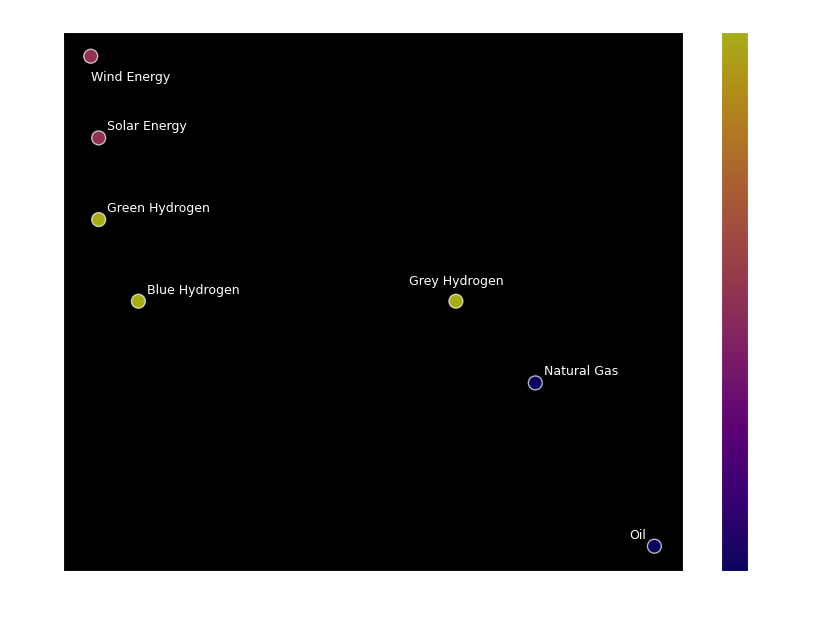

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


feature_labels = [
    "CO2 Emissions", "Global Sentiment"
]
energy_types = [
    "Green Hydrogen", "Blue Hydrogen", "Grey Hydrogen",
    "Solar Energy", "Wind Energy", "Oil", "Natural Gas"
]

data = np.array([
    [1, 4],   # Green Hydrogen
    [2, 3.5],  # Blue Hydrogen
    [10, 3.5],  # Grey Hydrogen
    [1, 4.5],  # Solar Energy
    [0.8, 5],  # Wind Energy
    [15, 2],    # Oil
    [12, 3]     # Natural Gas
])

x_min= data[:, 0].min()
x_max= data[:, 0].max()
data[:, 0] = (data[:, 0] - x_min) / (x_max - x_min)

k = 3
kmeans = KMeans(n_clusters=k, random_state= 42)
kmeans.fit(data)
clusters = kmeans.labels_

x_feature = 0
y_feature = 1


plt.figure(figsize=(10, 7))
plt.style.use('dark_background')
scatter = plt.scatter(data[:, x_feature], data[:, y_feature], c=clusters, cmap='plasma', s=100, alpha=0.7, edgecolor='w')

for i, energy_type in enumerate(energy_types):
    if energy_type == "Wind Energy":
        plt.text(data[i, x_feature], data[i, y_feature] - 0.15, energy_type, fontsize=9, ha='left')
    elif energy_type == "Solar Energy":
        plt.text(data[i, x_feature]+0.015, data[i, y_feature] + 0.05, energy_type, fontsize=9, ha='left')
    elif energy_type == "Grey Hydrogen":
        plt.text(data[i, x_feature], data[i, y_feature] + 0.1, energy_type, fontsize=9, ha='center')
    elif energy_type == "Oil":
        plt.text(data[i, x_feature]-0.015 , data[i, y_feature] + 0.05, energy_type, fontsize=9, ha='right')
    else:
        plt.text(data[i, x_feature]+0.015 , data[i, y_feature] + 0.05, energy_type, fontsize=9)

plt.title("K-Means Clustering of Energy Types (k=3) based on CO2 Emissions & Global Sentiment")
plt.xlabel("Normalised CO2 Emissions (Lower is Better for Sustainability)")
plt.ylabel("Global Sentiment (Higher is Better for Market Perception)", color= 'white')
plt.grid(False)
plt.colorbar(scatter, label='Cluster')

plt.show()



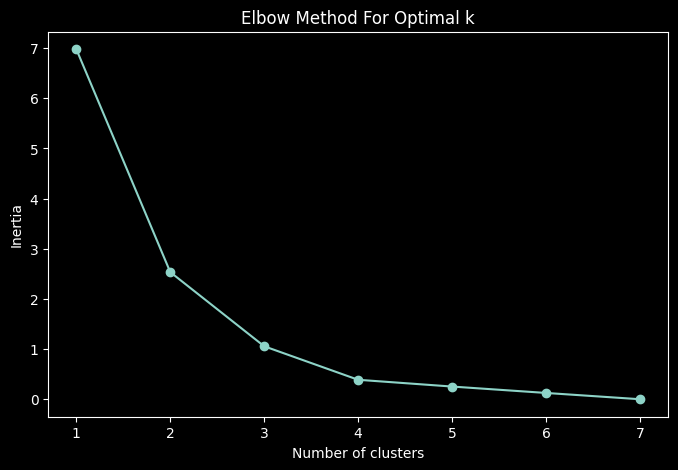

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(1, len(data) + 1)  # K should be in the range [1, number of samples]
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()